**IMPORTING NECCESSARY LIBRARIES**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**IMPORTING DATASET**

In [3]:
data =pd.read_csv('/content/drive/My Drive/Colab-Notebooks/Musabu/Crime_Prediction__Dataset.csv')

**DISPLAY SOME DATA RECORDS**

In [4]:
#Display Last five Record from the dataset
data.head()

,Case Number,Date,Primary Type,Description,Location Description,Arrest,Domestic,Year
0,JF404118,9/20/2022 17:43,NARCOTICS,MANUFACTURE / DELIVER - CRACK,SIDEWALK,True,False,2022
1,JF500029,12/6/2022 11:01,NARCOTICS,POSSESS - HEROIN (WHITE),SIDEWALK,True,False,2022
2,JF352663,8/11/2022 11:07,NARCOTICS,POSSESS - CANNABIS MORE THAN 30 GRAMS,GOVERNMENT BUILDING / PROPERTY,True,False,2022
3,JF394425,9/13/2022 12:45,NARCOTICS,MANUFACTURE / DELIVER - HEROIN (WHITE),SIDEWALK,True,False,2022
4,JF494435,11/30/2022 18:00,NARCOTICS,FOUND SUSPECT NARCOTICS,COMMERCIAL / BUSINESS OFFICE,True,False,2022


In [5]:
#Display  Dataset Shape
print ("Numbers of rows", data.shape[0])
print ("Numbers of rows", data.shape[1])

Numbers of rows 3000
Numbers of rows 8


**DATA PREPROCESSING**

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data_set =pd.read_csv('/content/drive/My Drive/Colab-Notebooks/Musabu/Crime_Prediction__Dataset.csv')

# Delete the useless columns:
cols_to_drop = ['Case Number', 'Date', 'Location Description']
data_set = data_set.drop(columns=cols_to_drop)

# Replace the value repeated if there is in the dataset: e.g.
columns = ["Description","Arrest", "Domestic"]
for col in columns:
    data_set[col] = data_set[col].astype('category')
    data_set[col] = data_set[col].cat.codes

# Delete all the duplicated rows:
data_set.drop_duplicates(keep='last')

# Save the new datasets into a new csv file:
data_set.to_csv('/content/drive/My Drive/Colab-Notebooks/Musabu/PredPreprocessedCrimeDataSet.csv')

**STORE FUTURE MATRIX IN X (OUR INDEPENDENT VARIABLES OR TARGET) I VECTOR Y**

In [7]:
import pandas as pd
import numpy as np
# Load dataset
data_set =pd.read_csv('/content/drive/My Drive/Colab-Notebooks/Musabu/PredPreprocessedCrimeDataSet.csv')
data_set = data_set.loc[:, ~data_set.columns.str.contains('^Unnamed')]
X = data_set.drop('Primary Type',axis=1)
y = data_set['Primary Type']

**SPLITTING DATASET INTO THE TRAINING AND TESTING SET TO CHECK THE PERFORMANCE OF OUR MACHINE**

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size = 0.20,random_state = 42)

**CREATING MACHINE LEARNING PIPELINE USING SKLEARN-LEARN**

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, precision_score, recall_score
from sklearn.pipeline import Pipeline

pipeline_lr = Pipeline([('scaler1', StandardScaler()),
                       ('lr_classifier', LogisticRegression())])

pipeline_svm = Pipeline([('scaler2', StandardScaler()),
                       ('svc_classifier', SVC())])

pipeline_dt = Pipeline([('dt_classifier', DecisionTreeClassifier())])
pipeline_rf = Pipeline([('rf_classifier', RandomForestClassifier(max_depth=3))])

pipelines = [pipeline_lr,
             pipeline_svm,
             pipeline_dt,
             pipeline_rf]

pipelines
for pipe in pipelines:
    pipe.fit(X_train,y_train)

pipe_dict = {0:'LogisticRegression',
            1:'SupportVectorClassifier',
            2:'DecisionTreeClassifier',
            3:'RandomForestClassifier'}

pipe_dict

for i,model in enumerate(pipelines): print("{} Test Accurancy: {}".format(pipe_dict[i],model.score(X_test,y_test)*100))

LogisticRegression Test Accurancy: 66.16666666666666
SupportVectorClassifier Test Accurancy: 89.33333333333333
DecisionTreeClassifier Test Accurancy: 99.83333333333333
RandomForestClassifier Test Accurancy: 90.33333333333333


**RANDOM FOREST**

In [12]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

lr = LogisticRegression(
    max_iter=1000,        # more iterations for convergence
    solver="lbfgs",       # good default solver
    random_state=42
)

lr.fit(X, y)

LogisticRegression(max_iter=1000, random_state=42)

**VISUALIZATION OF REPORT**

Accuracy: 90.33333333333333
F1 Score: 90.20949928951613
Precision: 92.14600756670649
Recall: 90.33333333333333


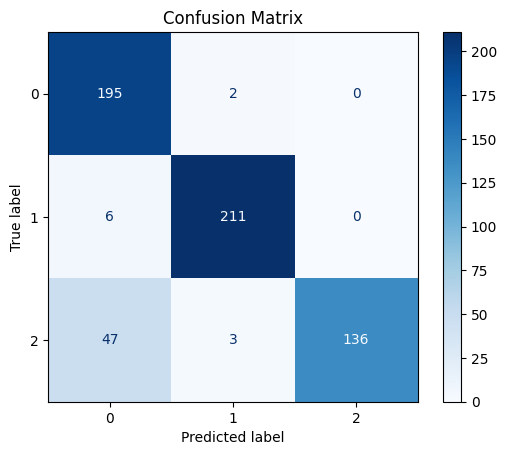

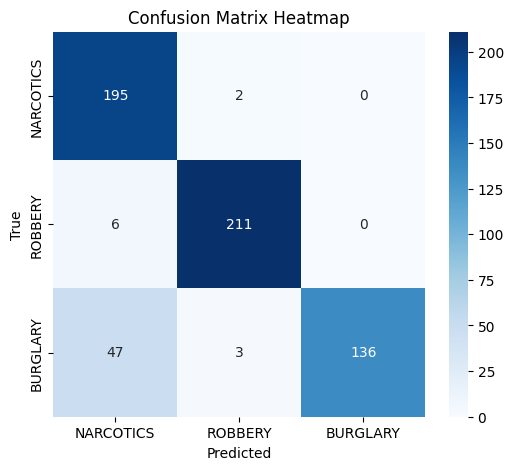

              precision    recall  f1-score   support

    BURGLARY       0.79      0.99      0.88       197
   NARCOTICS       0.98      0.97      0.97       217
     ROBBERY       1.00      0.73      0.84       186

    accuracy                           0.90       600
   macro avg       0.92      0.90      0.90       600
weighted avg       0.92      0.90      0.90       600



In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

# Step 1: Generate predictions using your trained model
y_pred = model.predict(X_test)  # model should already be trained

# Step 2: Evaluate the predictions
print("Accuracy:", accuracy_score(y_test, y_pred) * 100)
print("F1 Score:", f1_score(y_test, y_pred, average='weighted') * 100)
print("Precision:", precision_score(y_test, y_pred, average='weighted') * 100)
print("Recall:", recall_score(y_test, y_pred, average='weighted') * 100)

# After you already have y_test and y_pred
cm = confusion_matrix(y_test, y_pred)

# Option 1: Quick plot with sklearn
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix")
plt.show()

# Option 2: Prettier heatmap with seaborn
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=set(y), yticklabels=set(y))
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix Heatmap")
plt.show()

# Report
print(classification_report(y_test, y_pred))